In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.utils import resample

def evaluate_model(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    evaluation_metrics = {
        'Confusion_Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    return evaluation_metrics


def logistic_regression_model(df, dep_variable, test_size=0.2, random_state=42, n_bootstrap=100):
    X = df.drop(columns=[dep_variable])
    y = df[dep_variable]

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the logistic regression model
    logistic_regression_model = LogisticRegression(max_iter = 1000, solver = "saga")
    logistic_regression_model.fit(X_train, y_train)
    y_pred = logistic_regression_model.predict(X_test)
    evaluation_metrics = evaluate_model(y_test, y_pred)

    # Get coefficients
    coefficients = logistic_regression_model.coef_

    # Perform bootstrapping to estimate variance of coefficients
    coef_bootstraps = []
    for _ in range(n_bootstrap):
        X_boot, y_boot = resample(X_train, y_train, random_state=random_state)
        model = LogisticRegression()
        model.fit(X_boot, y_boot)
        coef_bootstraps.append(model.coef_)
    variance_coefficients = np.var(coef_bootstraps, axis=0)

    # # Perform t-test for coefficients
    # X_train = sm.add_constant(X_train)  # Add constant for intercept
    # model = sm.Logit(y_train, X_train)
    # result = model.fit(disp=0)  # Fit logistic regression model
    # t_test_results = result.t_test()

    return logistic_regression_model, evaluation_metrics, coefficients, variance_coefficients



df = pd.read_csv('/content/final_processed_data.csv')

# regression_model_child, evaluation_metrics_child, coefficients_child, variance_coefficients_child, t_test_results_child=logistic_regression_model(df,"Child is alive")
# regression_model_PrenatalCare, evaluation_metrics_PrenatalCare, coefficients_PrenatalCare, variance_coefficients_PrenatalCare, t_test_results_PrenatalCare=logistic_regression_model(df,"PrenatalCare")
# regression_model_Hospital,evaluation_metrics_Hospital, coefficients_Hospital, variance_coefficients_Hospital, t_test_results_Hospital=logistic_regression_model(df,"Hospital delivery")


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 23 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Child is alive                                                     1823 non-null   int64  
 1   Told about pregnancy complications                                 1699 non-null   float64
 2   Has money for her own use                                          1823 non-null   int64  
 3   Age of Mother                                                      1823 non-null   int64  
 4   PrenatalCare                                                       1823 non-null   int64  
 5   Std of Living (Med)                                                1823 non-null   int64  
 6   Std of Living (High)                                               1823 non-null   int64  
 7   allowed to go alone     

In [84]:
df.dropna(inplace=True)

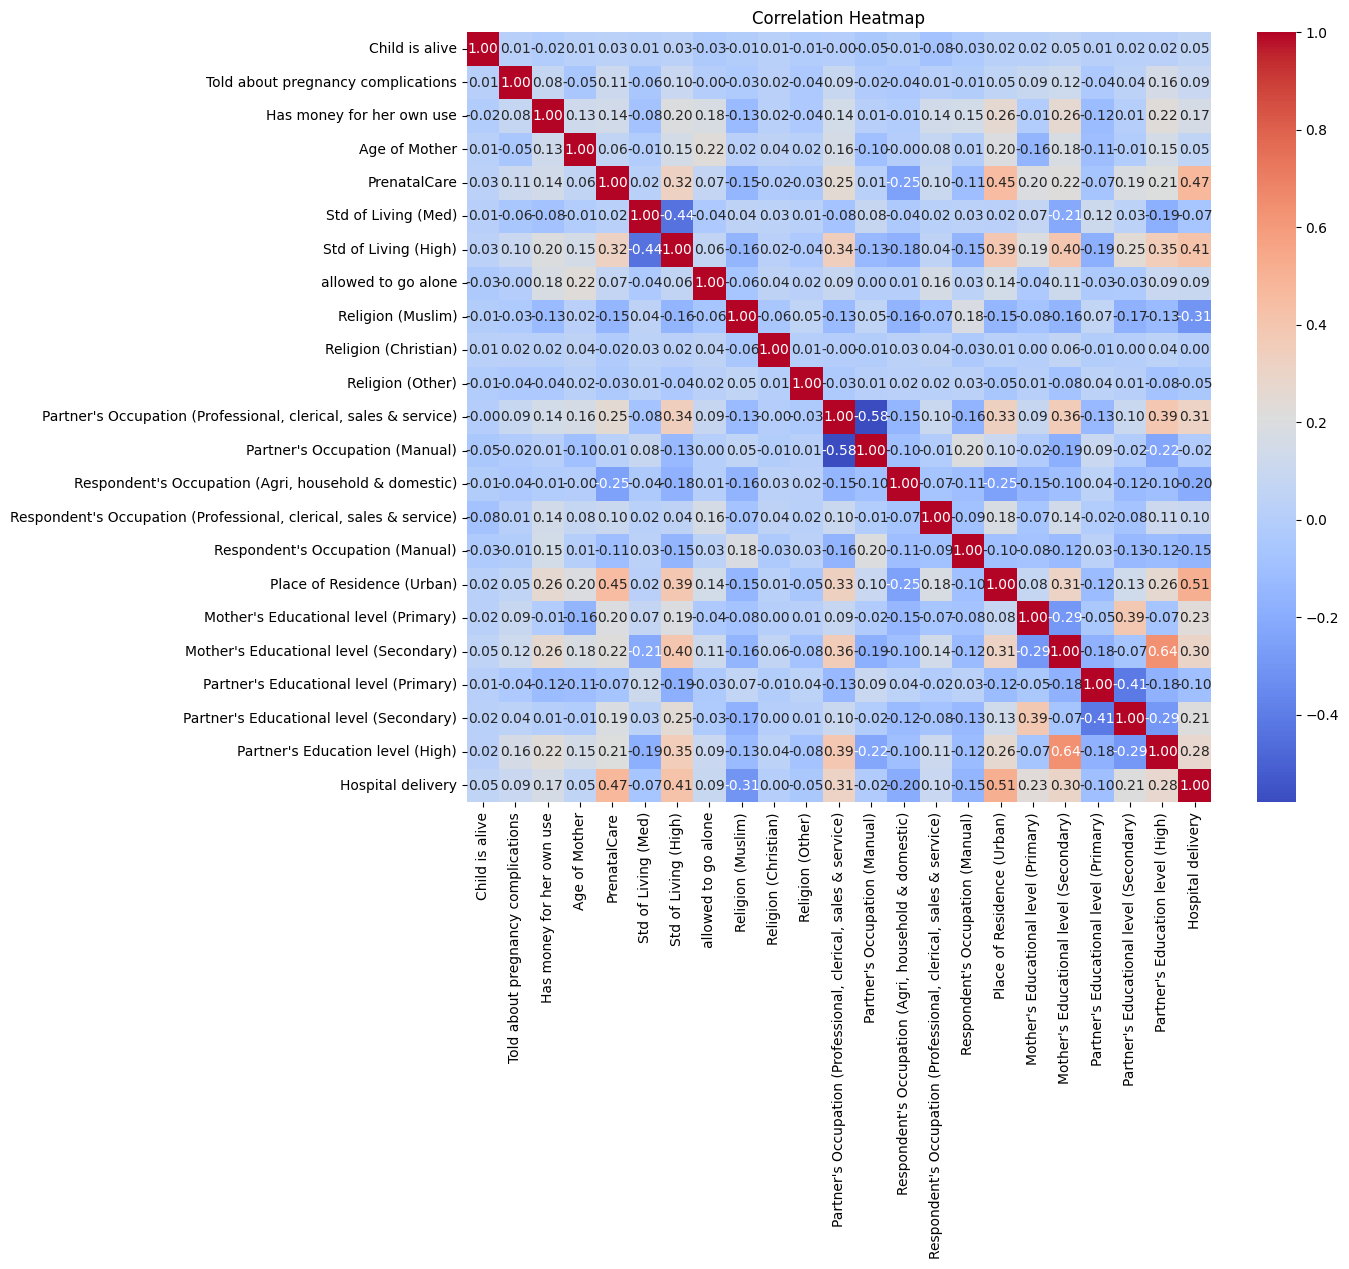

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df):
    plt.figure(figsize=(12, 10))  # Adjust the figsize as needed
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

# Assuming df is your DataFrame
plot_heatmap(df)


In [86]:
# df.drop(["Age of Mother"],inplace=True)
df.columns


Index(['Child is alive', 'Told about pregnancy complications',
       'Has money for her own use', 'Age of Mother', 'PrenatalCare',
       'Std of Living (Med)', 'Std of Living (High)', 'allowed to go alone',
       'Religion (Muslim)', 'Religion (Christian)', 'Religion (Other)',
       'Partner's Occupation (Professional, clerical, sales & service)',
       'Partner's Occupation (Manual)',
       'Respondent's Occupation (Agri, household & domestic)',
       'Respondent's Occupation (Professional, clerical, sales & service)',
       'Respondent's Occupation (Manual)', 'Place of Residence (Urban)',
       'Mother's Educational level (Primary)',
       'Mother's Educational level (Secondary)',
       'Partner's Educational level (Primary)',
       'Partner's Educational level (Secondary)',
       'Partner's Education level (High)', 'Hospital delivery'],
      dtype='object')

In [87]:
# df.drop(columns=['Age of Mother','Allowed to go to: market',
#        'Allowed to go to: health facility',
#        'Allowed to go to: places outside this village/community','Std of Living (Med)', 'Std of Living (High)','Religion (Muslim)', 'Place of delivery',"Mother's Educational level (Secondary)",'Place of Residence (Urban)'], inplace=True)

In [89]:
regression_model_child, evaluation_metrics_child, coefficients_child, variance_coefficients_child = logistic_regression_model(df,"Child is alive")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/

In [90]:
print(evaluation_metrics_child, coefficients_child, variance_coefficients_child)

{'Confusion_Matrix': array([[  0,  10],
       [  0, 330]]), 'Accuracy': 0.9705882352941176, 'Precision': 0.9420415224913495, 'Recall': 0.9705882352941176, 'F1-Score': 0.9561018437225636} [[ 0.6024521  -0.17253157  0.05618377  0.33309635  0.24368874  0.17775703
  -0.32367206  0.20056543  0.13021926  0.74196801 -0.96012853 -0.90793324
  -0.12675648 -1.17827334 -0.0583839   0.03307544  0.21273287  0.99369664
   0.59706872  0.13628132  0.38818613  0.48808909]] [[3.08148791e-31 4.81482486e-33 3.00926554e-34 0.00000000e+00
  7.70371978e-34 1.50992908e-31 4.43734259e-31 1.97215226e-31
  9.98402083e-31 9.10302825e-35 2.41588652e-30 7.88860905e-31
  1.10933565e-31 1.23259516e-30 1.10933565e-31 3.77482269e-32
  1.97215226e-31 2.41588652e-30 4.43734259e-31 1.92592994e-32
  1.10933565e-31 9.98402083e-31]]


#pt2

In [91]:
df['PrenatalCare']

0       1
1       1
2       1
3       1
4       1
       ..
1818    0
1819    1
1820    0
1821    0
1822    1
Name: PrenatalCare, Length: 1699, dtype: int64

In [92]:
regression_model_PrenatalCare, evaluation_metrics_PrenatalCare, coefficients_PrenatalCare, variance_coefficients_PrenatalCare = logistic_regression_model(df,"PrenatalCare")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

In [93]:
print(evaluation_metrics_PrenatalCare, coefficients_PrenatalCare, variance_coefficients_PrenatalCare)

{'Confusion_Matrix': array([[ 69,  33],
       [ 45, 193]]), 'Accuracy': 0.7705882352941177, 'Precision': 0.7793665579878901, 'Recall': 0.7705882352941177, 'F1-Score': 0.7739942528735633} [[ 0.24401008  0.32320218 -0.00920093  0.0025213   0.27688227  0.6446224
   0.13974451 -0.11796158 -0.50799902 -0.34490792  0.14942249  0.16226545
  -0.62899958  0.42039682 -0.33488416  1.61304665  0.4104613   1.21036452
   0.2299846   0.38096     0.70014083  0.94734027]] [[1.10933565e-31 1.10933565e-31 6.24001302e-32 2.43750509e-34
  3.77482269e-32 6.03971631e-31 7.70371978e-34 2.49600521e-31
  3.77482269e-32 1.23259516e-32 1.23259516e-32 8.13705402e-33
  9.98402083e-31 4.43734259e-31 2.03426350e-33 3.15544362e-30
  1.30192864e-31 1.77986742e-29 2.77333912e-32 3.08148791e-33
  1.77493704e-30 1.49144015e-30]]


In [94]:
regression_model_Hospital,evaluation_metrics_Hospital, coefficients_Hospital, variance_coefficients_Hospital=logistic_regression_model(df,"Hospital delivery")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

In [95]:
print(evaluation_metrics_Hospital, coefficients_Hospital, variance_coefficients_Hospital)

{'Confusion_Matrix': array([[127,  23],
       [ 32, 158]]), 'Accuracy': 0.8382352941176471, 'Precision': 0.8401990421937565, 'Recall': 0.8382352941176471, 'F1-Score': 0.8386289852082984} [[ 0.34559794  0.06681391 -0.07849535 -0.02884788  0.92472314 -0.17013198
   0.84461716  0.2542303  -1.18365504 -0.67602818 -0.36683293  0.36580323
   0.05481755 -0.21530463 -0.00408792 -0.14146086  1.61409496  0.80571054
   2.18521611 -0.03189214  0.12823232  1.13749515]] [[7.70371978e-32 9.43705673e-33 1.50992908e-31 2.43750509e-34
  4.93038066e-32 1.10933565e-31 0.00000000e+00 7.70371978e-32
  1.23259516e-30 4.44966854e-30 4.43734259e-31 7.88860905e-31
  5.89816045e-34 7.88860905e-31 6.03971631e-31 1.56000325e-32
  1.10933565e-29 3.08148791e-31 7.09974815e-30 1.73333695e-33
  3.72860037e-31 1.77493704e-30]]
